# **Predicción de enfermedades del corazón**

## **1 | Introducción**

Según estudios realizados por los Centros para el Control y Prevención de Enfermedades (CDC) una de las principales causas de muerte en las personas en los EE.UU es debido a enfermedades cardíacas. Alrededor del 47% de los estadounidenses tienen al menos 1 de cada 3 factores de riesgo clave de las enfermedades cardíacas como lo son: la presión arterial alta, colesterol alto, tabaquismo, estado diabético, obesidad(IMC alto), la no realización de la actividad física o el alcoholismo. 
La detección y prevención de estos factores en una etapa temprana pueden salvar inmumerables vidas. Es por ellos, que la aplicación de métodos de aprendizaje automático para detectar estos patrones en base a los datos pueden incidir positivamente en la salud de la población.

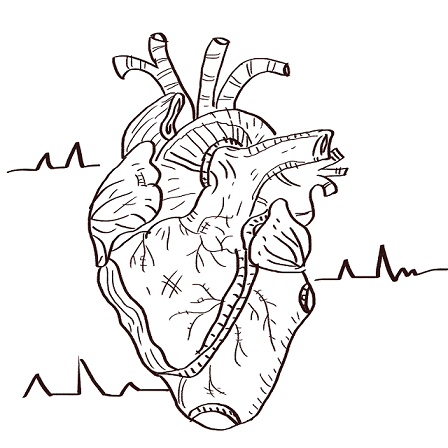


### Indicadores clave personales de enfermedad cardíaca


El conjunto de datos proviene de los CDC y es una parte importante del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes de EE. UU. Como describe el CDC: "Establecido en 1984 con 15 estados, BRFSS ahora recopila datos en los 50 estados, así como en el Distrito de Columbia y tres territorios de EE. UU. sistema de encuestas en el mundo". El conjunto de datos más reciente (al 15 de febrero de 2022) incluye datos de 2020. 
Los datos con los que trabajaremos provienen de la encuesta anual de los CDC de 2020 de 400 000 adultos relacionados con su estado de salud.

### Descripción de columnas: 



* HeartDisease: Encuestados que alguna vez informaron tener enfermedad coronaria (CHD) o infarto de miocardio (MI).
* BMI: Índice de masa corporal (IMC).
* Smoking: ¿Ha fumado al menos 100 cigarrillos en toda su vida? [Nota: 5 paquetes = 100 cigarrillos].
* AlcoholDrinking: Bebedores empedernidos (hombres adultos que beben más de 14 tragos por semana y mujeres adultas que beben más de 7 tragos por semana).
* Stroke: (Alguna vez le dijeron) (usted tuvo) un derrame cerebral?.
* PhysicalHealth: Ahora, pensando en su salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días durante los últimos 30 días su salud física no fue buena? (0-30 días)
* MentalHealth: Pensando en su salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días).
* DiffWalking: ¿Tiene serias dificultades para caminar o subir escaleras?
* Sex: ¿Es usted hombre o mujer?
* AgeCategory: Categoría de edad de catorce niveles.
* Race: Valor de raza/origen étnico imputado.
* Diabetic: (Alguna vez le dijeron) (usted tenía) diabetes?
* PhysicalActivity: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual.
* GenHealth: Diría usted que en general su salud es...  
* SleepTime: En promedio, ¿cuántas horas duerme en un período de 24 horas?
* Asthma: (Alguna vez le dijeron) (usted tenía) asma?
* KidneyDisease: Sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿alguna vez le dijeron que tenía una enfermedad renal?
* SkinCancer: ¿Alguna vez le dijeron que tenía cáncer de piel?



## Objetivos

El objetivo de esta investigación es poder predecir la probabilidad de que una determinada persona tenga una enfermedad cardiaca o no, dependiendo de distintos factores tales como:  la edad, el promedio de horas de descanso, la obesidad (IMC), si es fumador o no, si bebe alcohol, entre otras. 

## Integrantes
El equipo de trabajo está conformado por:  

*   Balbiani, Nicolás
*   Herrera, Nicolás
*   Vittola, Matías


 


## **2 | Importación librerías**

Importamos las librerías básicas

In [1]:
import os
import urllib.request
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

Importamos las librerías para visualizacion de datos

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Importamos las librerías para ML

In [3]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score ,recall_score ,f1_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.svm import SVC

## **3 | Lectura del dataset**

Cargamos el conjunto de datos

In [4]:
df_heart = pd.read_csv('../data/heart_2020_cleaned.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Tipos de variables del data set 

Variables categóricas 

HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

Variables numéricas 

BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime



In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df_heart.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

## Análisis variables numéricas

In [7]:
df_heart.describe().T.style.set_properties(**{'background-color': '#eb2a37','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


## Análisis variables categóricas

In [8]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("Enfermedad del corazón", "Fumador",
                                    "Bebe alcohol","Derrame cerebral",
                                    "Dificultad para caminar", "Sexo",
                                    'Raza', 'Diabético',
                                    'Acividad Física','Salud general',
                                    'Asma', 'Enfermedad en el riñon',
                                    'Tuvo Cáncer?'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#53eb38', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df_heart['HeartDisease'].value_counts().index),
                     values=[x for x in df_heart['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['Smoking'].value_counts().index),
                     values=[x for x in df_heart['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df_heart['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['Stroke'].value_counts().index),
                     values=[x for x in df_heart['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['DiffWalking'].value_counts().index),
                     values=[x for x in df_heart['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['Sex'].value_counts().index),
                     values=[x for x in df_heart['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['Race'].value_counts().index),
                     values=[x for x in df_heart['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['PhysicalActivity'].value_counts().index),
                     values=[x for x in df_heart['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['Diabetic'].value_counts().index),
                     values=[x for x in df_heart['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['GenHealth'].value_counts().index),
                     values=[x for x in df_heart['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['Asthma'].value_counts().index),
                     values=[x for x in df_heart['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['KidneyDisease'].value_counts().index),
                     values=[x for x in df_heart['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['SkinCancer'].value_counts().index),
                     values=[x for x in df_heart['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

## **4 | Data Wrangling**

Convertimos los datos del campo AgeCategory en valores del tipo float calculando la edad media de cada intervalo de esta manera pasa de ser una variable de tipo categorica a tener caracteristicas númericas.

In [9]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27,'70':70}

df_heart['AgeCategory'] = df_heart['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_heart['AgeCategory'] = df_heart['AgeCategory'].astype('float')

## **5 | Análisis Exploratorio**

### Target

Elegimos el campo HeartDisease como nuestra variable a predecir

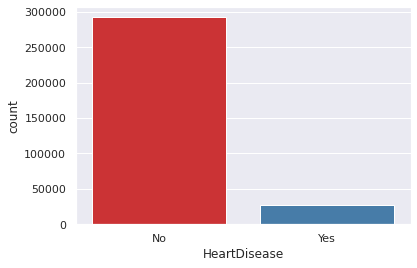

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(x = 'HeartDisease', data = df_heart, palette="Set1")

In [11]:
df_heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

* 292422 personas sin enfermedades cardíacas, 27373 personas con enfermedades cardíacas.
* El objetivo esta desbalanceado. Esto dificulta nuestra clasificación.

### **Matriz de correlaciones**

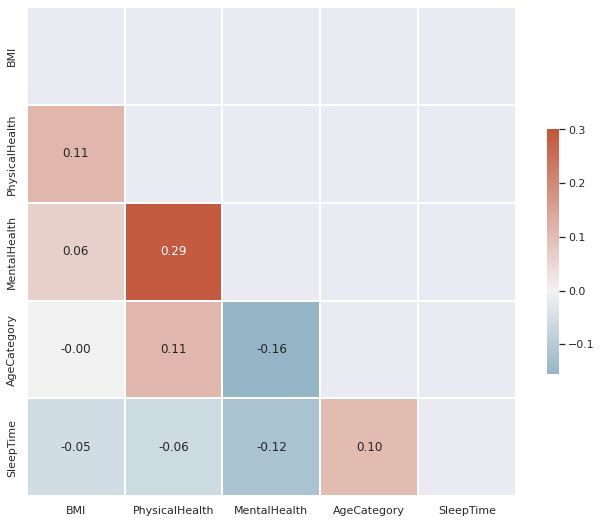

In [12]:
corr = df_heart.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fif, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corr, mask=mask, fmt='.2f', annot=True, lw=1,
           cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [13]:
corr[corr>0.0]

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
BMI,1.000000,0.109788,0.064131,NaN,NaN
PhysicalHealth,0.109788,1.000000,0.287987,0.11101,NaN
MentalHealth,0.064131,0.287987,1.000000,NaN,NaN
AgeCategory,NaN,0.111010,NaN,1.00000,0.1027
SleepTime,NaN,NaN,NaN,0.10270,1.0000


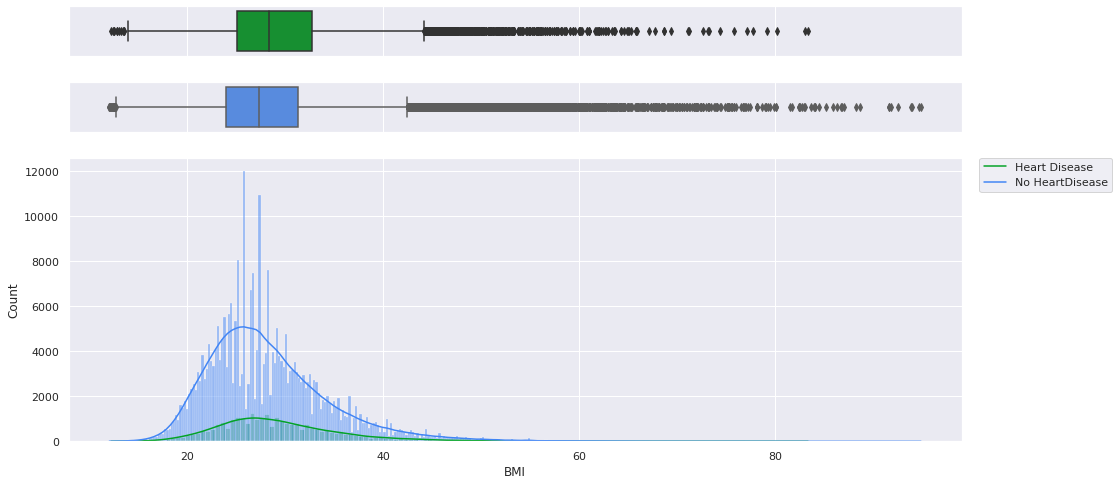

In [14]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#03a326', '#fbbc05', '#34a853']

sns.boxplot(x=df_heart[df_heart['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#03a326")
sns.histplot(df_heart[df_heart['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#03a326")

sns.boxplot(x=df_heart[df_heart['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df_heart[df_heart['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 

ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

Observación:
Las personas con enfermedades del corazón tienen un IMC más alto que las personas sin enfermedades del corazón.

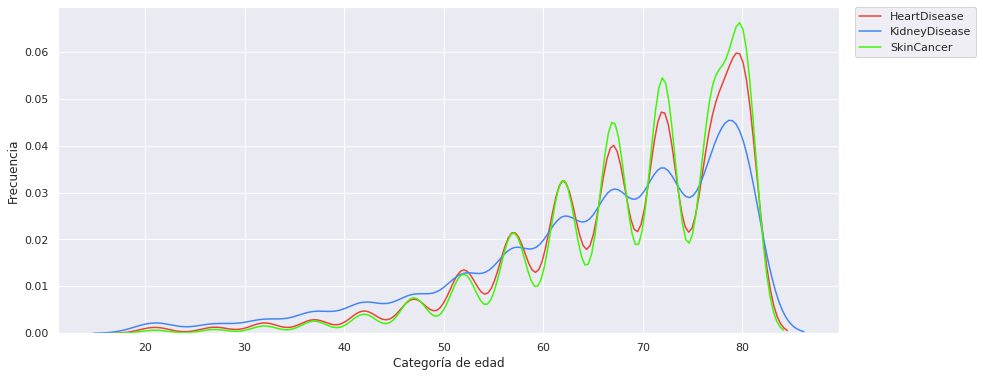

In [15]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df_heart[df_heart["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df_heart[df_heart["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df_heart[df_heart["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#3ef705", label="SkinCancer", ax = ax)

ax.set_xlabel("Categoría de edad")
ax.set_ylabel("Frecuencia")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Observación: Las personas con enfermedades cardíacas, cáncer de piel y enfermedades renales son en su mayoría personas con una mayor edad.

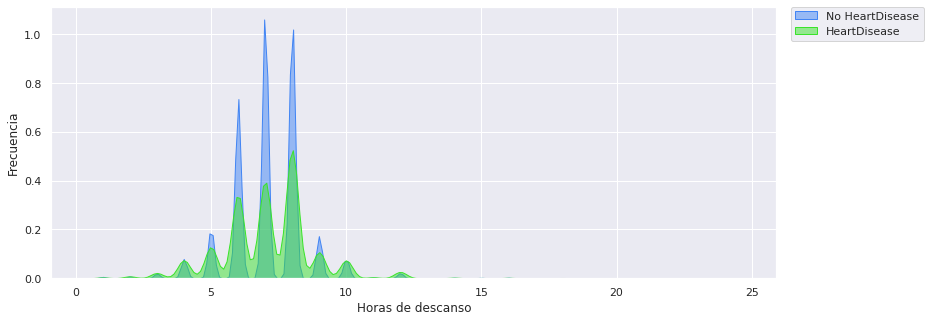

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_heart[df_heart["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df_heart[df_heart["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#3ae32b", label="HeartDisease", ax = ax)
ax.set_xlabel("Horas de descanso")
ax.set_ylabel("Frecuencia")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

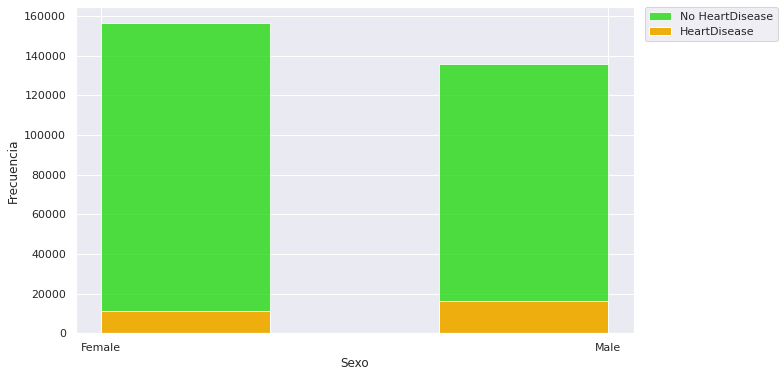

In [17]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df_heart[df_heart["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#24d914", label="No HeartDisease")
ax.hist(df_heart[df_heart["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#edae0e", label="HeartDisease")

ax.set_xlabel("Sexo")
ax.set_ylabel("Frecuencia")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Observación: el mayor casos de personas con problemas cardíacos se da en hombres.

In [18]:
female_with_heart_disease = len(df_heart[(df_heart['HeartDisease']=='Yes') & (df_heart['Sex']=='Female')])
num_female = len(df_heart[df_heart['Sex']=='Female'])
male_with_heart_disease = len(df_heart[(df_heart['HeartDisease']=='Yes') & (df_heart['Sex']=='Male')])
num_male = len(df_heart[df_heart['Sex']=='Male'])
print('Probabilidad de hombres con enfermedades cardíacas:', male_with_heart_disease/num_male)
print('Probabilidad de mujeres con enfermedades cardíacas:', female_with_heart_disease/num_female)

Probabilidad de hombres con enfermedades cardíacas: 0.10618461740904007
Probabilidad de mujeres con enfermedades cardíacas: 0.06694675367241738


## Analisis Multivariado

##### El consumo de cigarrillo será un factor que aumenta la probabilidad de sufrir un ataque cardiaco, acorde aumente la edad de la persona. 

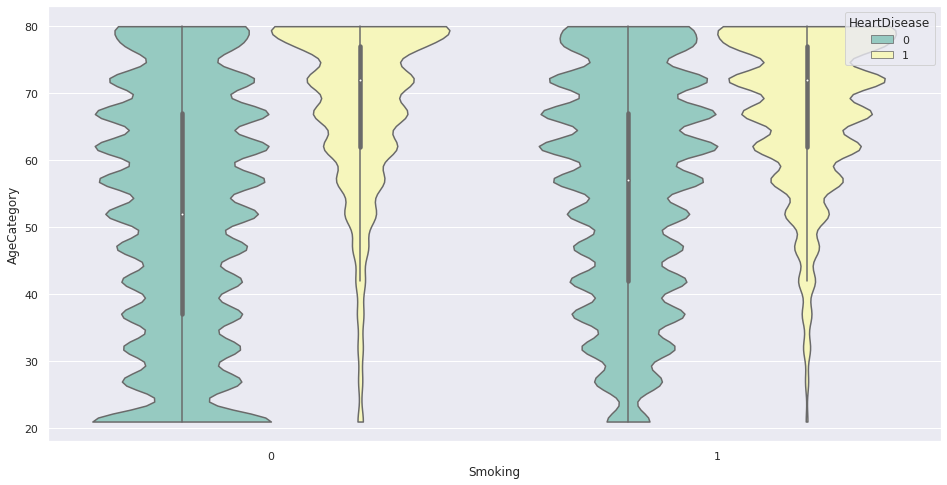

In [19]:
df_smoke= df_heart[['Smoking','AgeCategory','HeartDisease']].replace({'Yes':1, 'No':0})

sns.violinplot(data=df_smoke, x='Smoking', y='AgeCategory', hue='HeartDisease', cut=0, scale="width", palette="Set3")

##### El consumo de alcohól tendrá incidencia acorde al sexo de la persona.

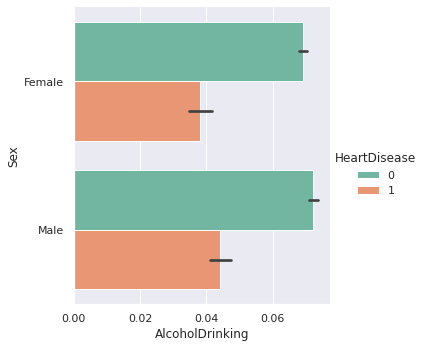

In [20]:
df_drink= df_heart[['AlcoholDrinking','Sex','HeartDisease']].replace({'Yes':1, 'No':0})

sns.catplot(data=df_drink, x='AlcoholDrinking', y='Sex', hue='HeartDisease', kind = 'bar', palette="Set2")

##### La actividad física tambien tendrá incidencia acorde al raza de la persona.

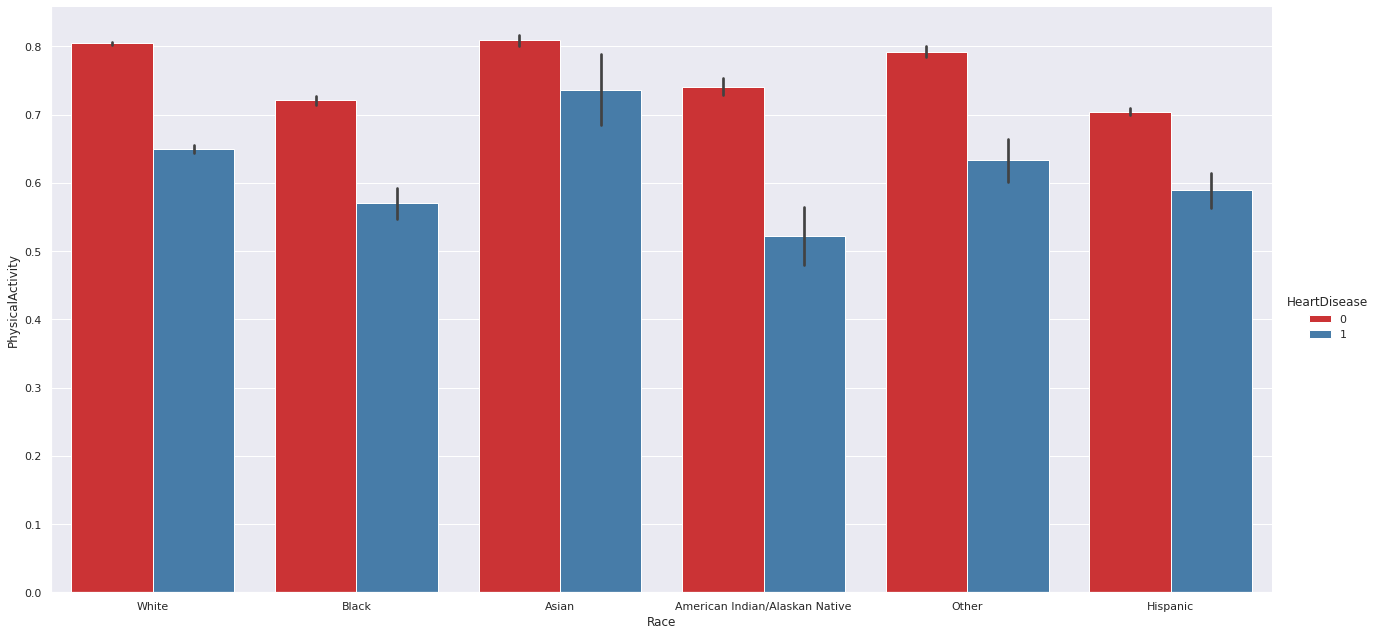

In [21]:
df_PhysicalActivity= df_heart[['PhysicalActivity','Race','HeartDisease']].replace({'Yes':1, 'No':0})

sns.catplot(data=df_PhysicalActivity, y='PhysicalActivity', x='Race', hue='HeartDisease', kind = 'bar', palette="Set1", height=9, aspect=2)

## **6 | Algoritmos de Clasificación**

Pasamos todos nuestros datos a numericos

In [22]:
df_heart_dummy = pd.get_dummies(df_heart, drop_first=True)

df_heart_dummy.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,57.0,5.0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,80.0,7.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,67.0,8.0,0,1,0,0,0,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,77.0,6.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,42.0,8.0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [23]:
df_heart_dummy.dropna()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,57.0,5.0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,80.0,7.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,67.0,8.0,0,1,0,0,0,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,77.0,6.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,42.0,8.0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,62.0,6.0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,37.0,5.0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,47.0,6.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,27.0,12.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Árbol de decisión

Seleccionamos todas las columnas

In [24]:
X = df_heart_dummy.drop('HeartDisease_Yes', axis=1)

Defino los datos correspondientes a las etiquetas. Y convertimos los valores categóricos a numéricos.

In [26]:
y = df_heart['HeartDisease']

y = y.replace({"No":0, "Yes":1})


Separamos los datos de "train" para entrenamiento(70%) y "test" prueba(30%) para probar los algoritmos

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Arbol de decisión

In [30]:
arbol_decision = DecisionTreeClassifier(max_depth=2, random_state = 42)

Entrenamos el modelo


In [31]:
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Realizo una predicción

In [32]:
y_train_pred = arbol_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_decision.predict(X_test) #Prediccion en Test

Creamos la matriz de confusión

In [33]:
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[87649     0]
 [ 8290     0]]


Observamos que no predijo ningún valor para 1. Para ello vamos a optimizar los hiperparámetros

In [34]:
arbol_decision.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Creamos una grilla de params. El cual debe ser un diccionario con el hiperparámetro como clave
y una lista de valores posibles.

In [35]:
from sklearn.exceptions import UndefinedMetricWarning

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
params_grid = {
    'criterion': ['gini', 'entropy'], #saqué 'log_loss' porque no andaba 
    'max_depth': list(range(2,10,1)),
    'min_samples_split': list(range(50,1050,50))
    
}
grid = GridSearchCV(arbol_decision, params_grid, scoring= 'precision_macro') #Elegi la precision para que tome el mejor segun eso
grid.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500, 550, 600, 650,
                                               700, 750, 800, 850, 900, 950,
                                               1000]},
             scoring='precision_macro')

Se realiza las nuevas pruebas con esos valores

### Creamos la Matriz de confusión

Matriz de Confusión:
[[58199   138]
 [ 5457   165]]


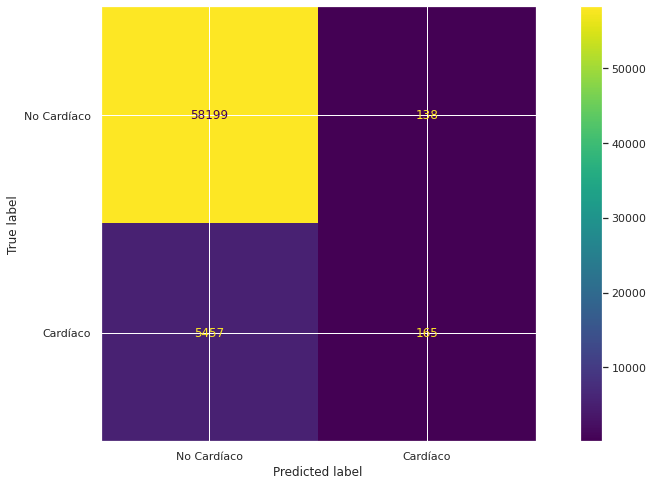

In [60]:
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=750,
                       random_state=42)

best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train) #Prediccion en Train
y_test_pred = best_model.predict(X_test) #Prediccion en Test

matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)
#Ploteamos la Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,
                             display_labels=['No Cardíaco', 'Cardíaco'])

disp.plot()
plt.show()

* 58199 casos donde se clasifican como no cardíaco y son no cardíaco.
* 5457 casos se clasifican como No cardíaco y son cardíaco.
* 138 casos se clasifican como cardíaco, y no son cardíaco.
* 165 casos se clasifican como cardíaco y son cardíaco.

### Calculo el accuracy, precision, recall, f1 en Train

In [61]:
ad_train_accuracy = accuracy_score(y_train, y_train_pred)
ad_train_precision = precision_score(y_train, y_train_pred)
ad_train_recall = recall_score(y_train, y_train_pred)
ad_train_f1 = f1_score(y_train, y_train_pred)
ad_train_classification_report = classification_report(y_train, y_train_pred)

### Calculo el accuracy, precision, recall, f1 en Test

In [62]:
ad_test_accuracy = accuracy_score(y_test, y_test_pred)
ad_test_precision = precision_score(y_test, y_test_pred)
ad_test_recall = recall_score(y_test, y_test_pred)
ad_test_f1 = f1_score(y_test, y_test_pred)
ad_test_classification_report = classification_report(y_test, y_test_pred)

## Resultados Árbol de decisión

In [63]:
print('% de aciertos sobre el set de entrenamiento:', ad_train_accuracy)
print('% de aciertos sobre el set de evaluación:',ad_test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9155943651401679
% de aciertos sobre el set de evaluación: 0.9125220844603574


In [64]:
print('% de precisión sobre el set de entrenamiento:', ad_train_precision)
print('% de precisión sobre el set de evaluación:',ad_test_precision)

% de precisión sobre el set de entrenamiento: 0.5731593662628145
% de precisión sobre el set de evaluación: 0.5445544554455446


In [65]:
print('% de recall sobre el set de entrenamiento:', ad_train_recall)
print('% de recall sobre el set de evaluación:', ad_test_recall)

% de recall sobre el set de entrenamiento: 0.028274562089099353
% de recall sobre el set de evaluación: 0.02934898612593383


In [66]:
print('% de f1 sobre el set de entrenamiento:', ad_train_f1)
print('% de f1 sobre el set de evaluación:', ad_test_f1)

% de f1 sobre el set de entrenamiento: 0.053890641430073605
% de f1 sobre el set de evaluación: 0.05569620253164557


In [67]:
print('% de Informe de clasificación sobre el set de entrenamiento:', ad_train_classification_report)
print('% de Informe de clasificación sobre el set de evaluación:', ad_test_classification_report)

% de Informe de clasificación sobre el set de entrenamiento:               precision    recall  f1-score   support

           0       0.92      1.00      0.96    234085
           1       0.57      0.03      0.05     21751

    accuracy                           0.92    255836
   macro avg       0.75      0.51      0.50    255836
weighted avg       0.89      0.92      0.88    255836

% de Informe de clasificación sobre el set de evaluación:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     58337
           1       0.54      0.03      0.06      5622

    accuracy                           0.91     63959
   macro avg       0.73      0.51      0.50     63959
weighted avg       0.88      0.91      0.88     63959



# Clasificación a través de Random Forest

Creamos el clasificador Random Forest

In [72]:
bosque_aleatorio = RandomForestClassifier()
bosque_aleatorio.fit(X_train, y_train)

RandomForestClassifier()

Observamos los hiperparametros que tiene por default

In [74]:
bosque_aleatorio.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Predecimos en test

In [104]:
ba_y_test_pred = bosque_aleatorio.predict(X_test)
ba_y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

Calculamos la precisión en test

[[57146  1191]
 [ 4946   676]]


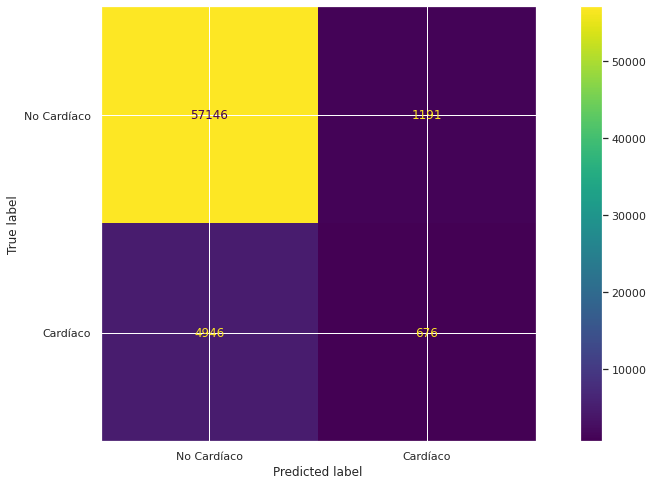

In [105]:
cm = confusion_matrix(y_test, ba_y_test_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['No Cardíaco', 'Cardíaco'])

disp.plot()
plt.show()

* 57136 casos donde se clasifican como no cardíaco y son no cardíaco.
* 4965 casos se clasifican como No cardíaco y son cardíaco.
* 1201 casos se clasifican como cardíaco, y no son cardíaco.
* 657 casos se clasifican como cardíaco y son cardíaco.

### Calculo el accuracy, precision, recall, f1 en Train

In [88]:
ba_train_accuracy = accuracy_score(y_train, ba_y_train_pred)
ba_train_precision = precision_score(y_train, y_train_pred)
ba_train_recall = recall_score(y_train, y_train_pred)
ba_train_f1 = f1_score(y_train, y_train_pred)
ba_train_classification_report = classification_report(y_train, y_train_pred)

### Calculo el accuracy, precision, recall, f1 en Test

In [89]:
ba_test_accuracy = accuracy_score(y_test, y_test_pred)
ba_test_precision = precision_score(y_test, y_test_pred)
ba_test_recall = recall_score(y_test, y_test_pred)
ba_test_f1 = f1_score(y_test, y_test_pred)
ba_test_classification_report = classification_report(y_test, y_test_pred)

### Resultados

In [93]:
print('% de aciertos sobre el set de entrenamiento:', ba_train_accuracy)
print('% de aciertos sobre el set de evaluación:',ba_test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9155943651401679
% de aciertos sobre el set de evaluación: 0.9040479056895824


In [94]:
print('% de precisión sobre el set de entrenamiento:', ba_train_precision)
print('% de precisión sobre el set de evaluación:', ba_test_precision)

% de precisión sobre el set de entrenamiento: 0.5731593662628145
% de precisión sobre el set de evaluación: 0.36207820032137117


In [95]:
print('% de recall sobre el set de entrenamiento:', ba_train_recall)
print('% de recall sobre el set de evaluación:', ba_test_recall)

% de recall sobre el set de entrenamiento: 0.028274562089099353
% de recall sobre el set de evaluación: 0.12024190679473497


In [96]:
print('% de f1 sobre el set de entrenamiento:', ba_train_f1)
print('% de f1 sobre el set de evaluación:', ba_test_f1)

% de f1 sobre el set de entrenamiento: 0.053890641430073605
% de f1 sobre el set de evaluación: 0.18053144612097743


In [97]:
print('% de Informe de clasificación sobre el set de entrenamiento:', ba_train_classification_report)
print('% de Informe de clasificación sobre el set de evaluación:', ba_test_classification_report)

% de Informe de clasificación sobre el set de entrenamiento:               precision    recall  f1-score   support

           0       0.92      1.00      0.96    234085
           1       0.57      0.03      0.05     21751

    accuracy                           0.92    255836
   macro avg       0.75      0.51      0.50    255836
weighted avg       0.89      0.92      0.88    255836

% de Informe de clasificación sobre el set de evaluación:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58337
           1       0.36      0.12      0.18      5622

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



#KNN

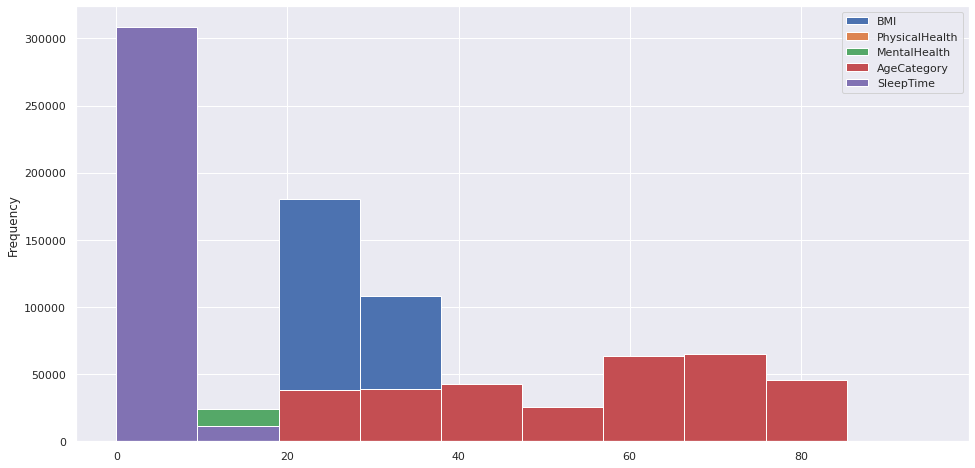

In [98]:
df_heart.plot(kind='hist')
plt.show()

Entrenamos el algoritmo KNN

In [99]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=2, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


0.8721681076939914

In [102]:
KNN_y_predicted = KNNClassifier.predict(X_test)

[[54724  3613]
 [ 4563  1059]]


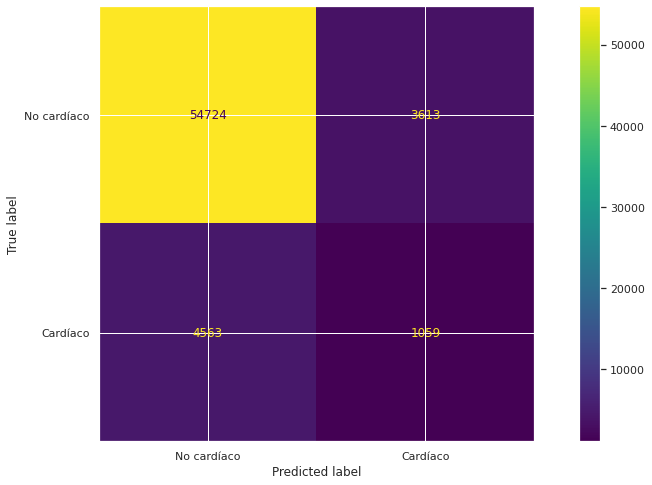

In [103]:
#Matriz de Confusión
cm = confusion_matrix(y_test, KNN_y_predicted)
print(cm)

#Ploteamos la Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['No cardíaco','Cardíaco'])
disp.plot()

plt.show()

* 57136 casos donde se clasifican como no cardíaco y son no cardíaco.
* 4965 casos se clasifican como No cardíaco y son cardíaco.
* 1201 casos se clasifican como cardíaco, y no son cardíaco.
* 657 casos se clasifican como cardíaco y son cardíaco.

### Calculo el accuracy, precision, recall, f1 en Train

In [ ]:
n_train_accuracy = accuracy_score(y_train, y_train)
n_train_precision = precision_score(y_train, KNN_y_predicted)
n_train_recall = recall_score(y_train, KNN_y_predicted)
n_train_f1 = f1_score(y_train, KNN_y_predicted)
n_train_classification_report = classification_report(y_train, KNN_y_predicted)

### Calculo el accuracy, precision, recall, f1 en Test

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

### Resultados

In [ ]:
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:',test_precision)

In [ ]:
print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

In [ ]:
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('% de f1 sobre el set de evaluación:', test_f1)

In [ ]:
print('% de Informe de clasificación sobre el set de entrenamiento:',train_classification_report)
print('% de Informe de clasificación sobre el set de evaluación:',test_classification_report)

## **7 | Conclusión**

A lo largo de este análisis cargamos el data se original. Creamos un Df el cual analizamos sus variables,, las métricas que tenía. Realizamos un trabajo de limpieza de los datos 
Luego aplicamos los algoritmos de maquine learning los cuales fueron: 
1. Árbol de decisión
2. Bosque aleatorio
3. Vecinos cercanos

Se llegó a la conclución que el ML que mejor se aplicó fue "Bosque aletorio" a que fue el que mejor falsos positivos detecto.

<a id='Bibliografia'></a>
## **8 | Bibliografía**

<ol>
    <li><a href="https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease">personal-key-indicators-of-heart-disease(Data set original)</a></li>
</ol>